## Load Data

In [116]:
# %%timeit
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Timestamp
from datetime import datetime
from time import time
from os import getcwd
from os.path import join

path = join(getcwd().rstrip('src'), 'data/owid-covid-data.csv').replace('\\', '/')
data = pd.read_csv(path)

# 1. Make a graph like this for Taiwan and World before the end of July, 2021.

## Get Location Data

In [117]:
# Set location
locs = list(set(data.location)) # some elements are not locations
# print(locs)
loc1 = 'Taiwan'
loc2 = 'World'

In [118]:
# Get location data
l1d = data.loc[data['location']==loc1]
l2d = data.loc[data['location']==loc2]
print(len(l1d))
print(len(l2d))
# l1d.head(5)
# l2d.head(5)

983
977


In [119]:
# needed columns date, total_cases, total_deaths
col_all = list(data.columns)
print(col_all)
col_all.remove('date')
col_all.remove('total_cases')
col_all.remove('total_deaths')
for x in col_all:
    del l1d[x]
    del l2d[x]
# l1d.head(30)
# l2d.head(30)

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [120]:
l1d.insert(1, '%death', l1d.total_deaths / l1d.total_cases)
l2d.insert(1, '%death', l2d.total_deaths / l2d.total_cases)
print(l1d.shape)
print(l2d.shape)

(983, 4)
(977, 4)


In [121]:
start = '2019-12-31'
l1d = l1d[(l1d.date >= start)]
l2d = l2d[(l2d.date >= start)]
l1d.date = pd.to_datetime(l1d['date'], format='%Y-%m-%d')
l2d.date = pd.to_datetime(l2d['date'], format='%Y-%m-%d')

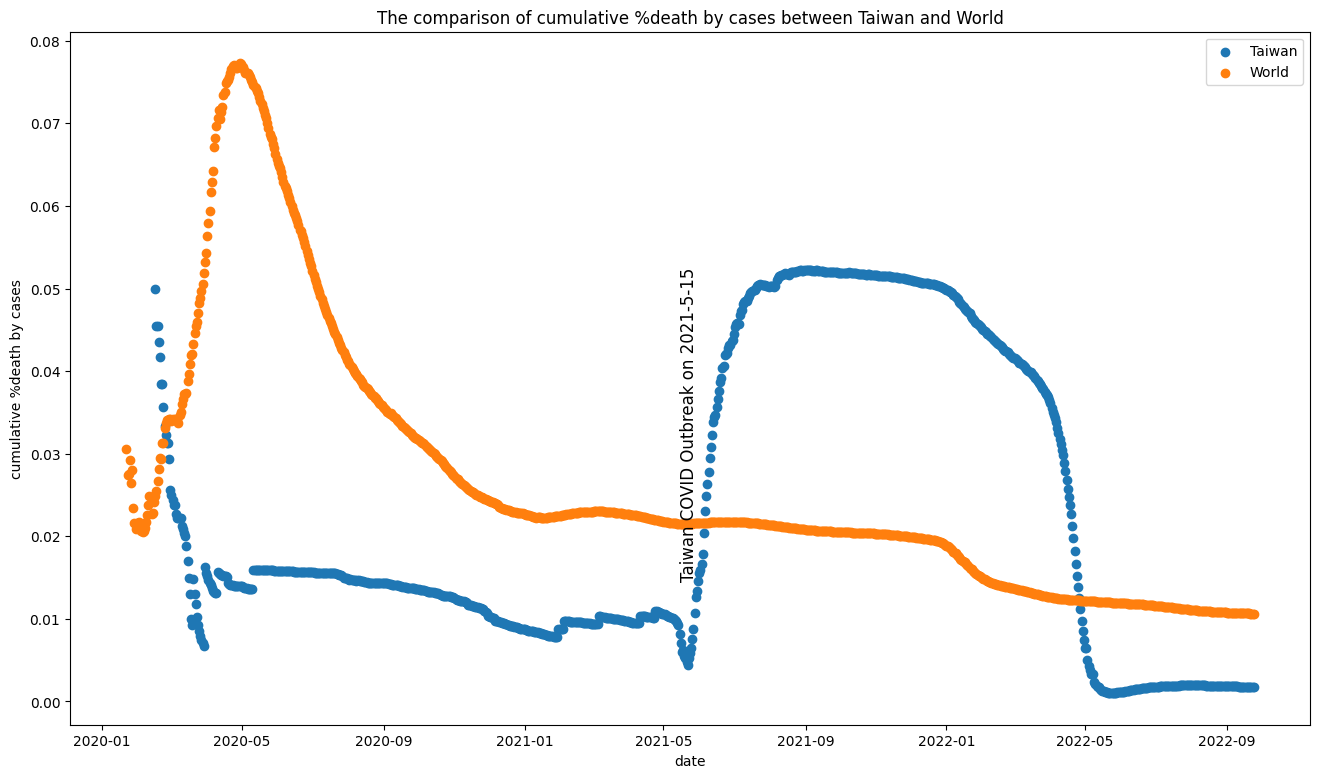

In [122]:
%matplotlib inline
plt.figure(figsize=(16,9))
plt.title('The comparison of cumulative %death by cases between {0} and {1}'.format(loc1, loc2))
plt.xlabel('date')
plt.ylabel('cumulative %death by cases')
plt.scatter(l1d.date, l1d['%death'])
plt.scatter(l2d.date, l2d['%death'])
plt.legend(['Taiwan', 'World'])
plt.text(Timestamp("2021-5-15"), 0.015, 'Taiwan COVID Outbreak on 2021-5-15', fontsize=12, rotation='vertical')

# export plot
path = join(getcwd().rstrip('src'), 'pic/BD_w7_hw/BD_w7_hw_date.jpg').replace('\\', '/')
plt.draw()
plt.savefig(path, dpi=300)

In [123]:
l1d.insert(1, 'dstart', start)
l2d.insert(1, 'dstart', start)
l1d.dstart = pd.to_datetime(l1d['dstart'], format='%Y-%m-%d')
l2d.dstart = pd.to_datetime(l2d['dstart'], format='%Y-%m-%d')
l1d.insert(2, 'ddiff', (l1d['date'] - l1d['dstart'])/np.timedelta64(1, 'D'))
l2d.insert(2, 'ddiff', (l2d['date'] - l2d['dstart'])/np.timedelta64(1, 'D'))
# l1d.head(30)
# l2d.head(30)
# print(l1d.shape)
# print(l2d.shape)

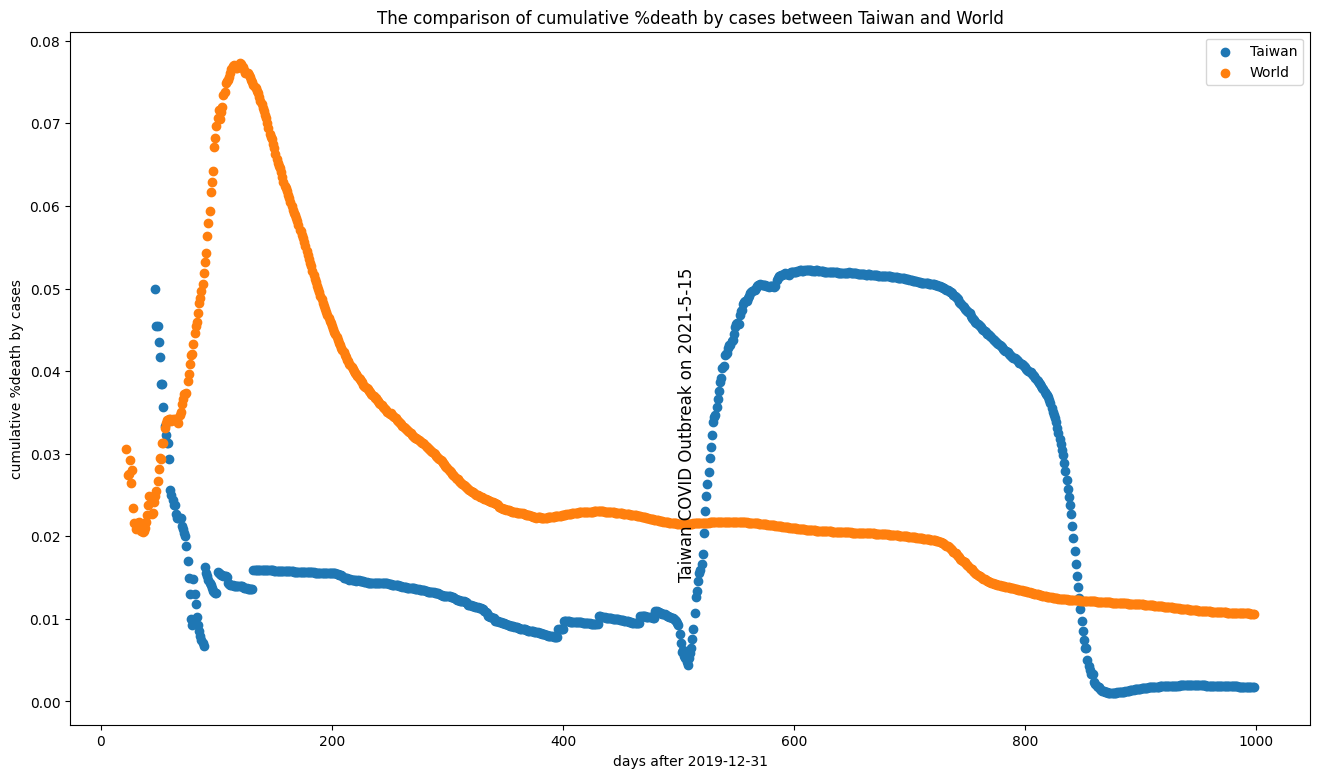

In [124]:
%matplotlib inline
plt.figure(figsize=(16,9))
plt.title('The comparison of cumulative %death by cases between {0} and {1}'.format(loc1, loc2))
plt.xlabel('days after 2019-12-31')
plt.ylabel('cumulative %death by cases')
plt.scatter(l1d.ddiff, l1d['%death'])
plt.scatter(l2d.ddiff, l2d['%death'])
plt.legend(['Taiwan', 'World'])
plt.text(500, 0.015, 'Taiwan COVID Outbreak on 2021-5-15', fontsize=12, rotation='vertical')

# export plot
path = join(getcwd().rstrip('src'), 'pic/BD_w7_hw/BD_w7_hw_days.jpg').replace('\\', '/')
plt.draw()
plt.savefig(path, dpi=300)

# 2. Explain why Taiwan has higher %death by cases than world average in July 2021.

Suspected data related to this issue.
1. 'icu_patients'
2. 'hosp_patients'
3. 'total_vaccinations'
4. 'people_vaccinated'
5. 'people_fully_vaccinated'
6. 'total_boosters'

In [198]:
# create function to export img
sus_col = ['icu_patients', 'hosp_patients', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']
def display_relationship(parameter=['date'], show_row=10, print_result=False):
    l1d = data.loc[data['location']==loc1]
    l2d = data.loc[data['location']==loc2]
    col_all = list(data.columns)
    col_all.remove('date')
    col_all.remove('total_cases')
    col_all.remove('total_deaths')
    for x in parameter:
        col_all.remove(x)
    for x in col_all:
        del l1d[x]
        del l2d[x]
    l1d.insert(1, '%death', l1d.total_deaths / l1d.total_cases)
    l2d.insert(1, '%death', l2d.total_deaths / l2d.total_cases)
    start = '2019-12-31'
    l1d = l1d[(l1d.date >= start)]
    l2d = l2d[(l2d.date >= start)]
    l1d.date = pd.to_datetime(l1d['date'], format='%Y-%m-%d')
    l2d.date = pd.to_datetime(l2d['date'], format='%Y-%m-%d')
    print(l1d.head(show_row)) if print_result else None
    print(l2d.head(show_row)) if print_result else None
    %matplotlib inline
    fig, axs = plt.subplots(len(parameter)+1, 1, figsize=(20,7*len(parameter)))
    fig.tight_layout(pad=5, h_pad=3, w_pad=3)
    fig.suptitle('The comparison of cumulative %death by cases between {0} and {1}'.format(loc1, loc2))
    axs[0].set_xlabel('date')
    axs[0].set_ylabel('cumulative %death by cases')
    axs[0].scatter(l1d.date, l1d['%death'], label=loc1)
    axs[0].scatter(l2d.date, l2d['%death'], label=loc2)
    axs[0].legend()
    axs[0].text(Timestamp("2021-5-15"), 0.015, 'Outbreak on 2021-5-15', fontsize=12, rotation='vertical')
    for x in range(len(parameter)):
        axs[x+1].set_xlabel('date')
        axs[x+1].set_ylabel(parameter[x])
        axs[x+1].scatter(l1d.date, l1d[parameter[x]], label=loc1 + '_' + parameter[x])
        axs[x+1].scatter(l2d.date, l2d[parameter[x]], label=loc2 + '_' + parameter[x])
        axs[x+1].legend()
        axs[x+1].axvline(Timestamp("2021-5-15"))
    # export plot
    path = join(getcwd().rstrip('src'), 'pic/BD_w7_hw/BD_w7_hw_dr_date.jpg').replace('\\', '/')
    plt.draw()
    plt.savefig(path, dpi=300)

0
1
2
3
4
5


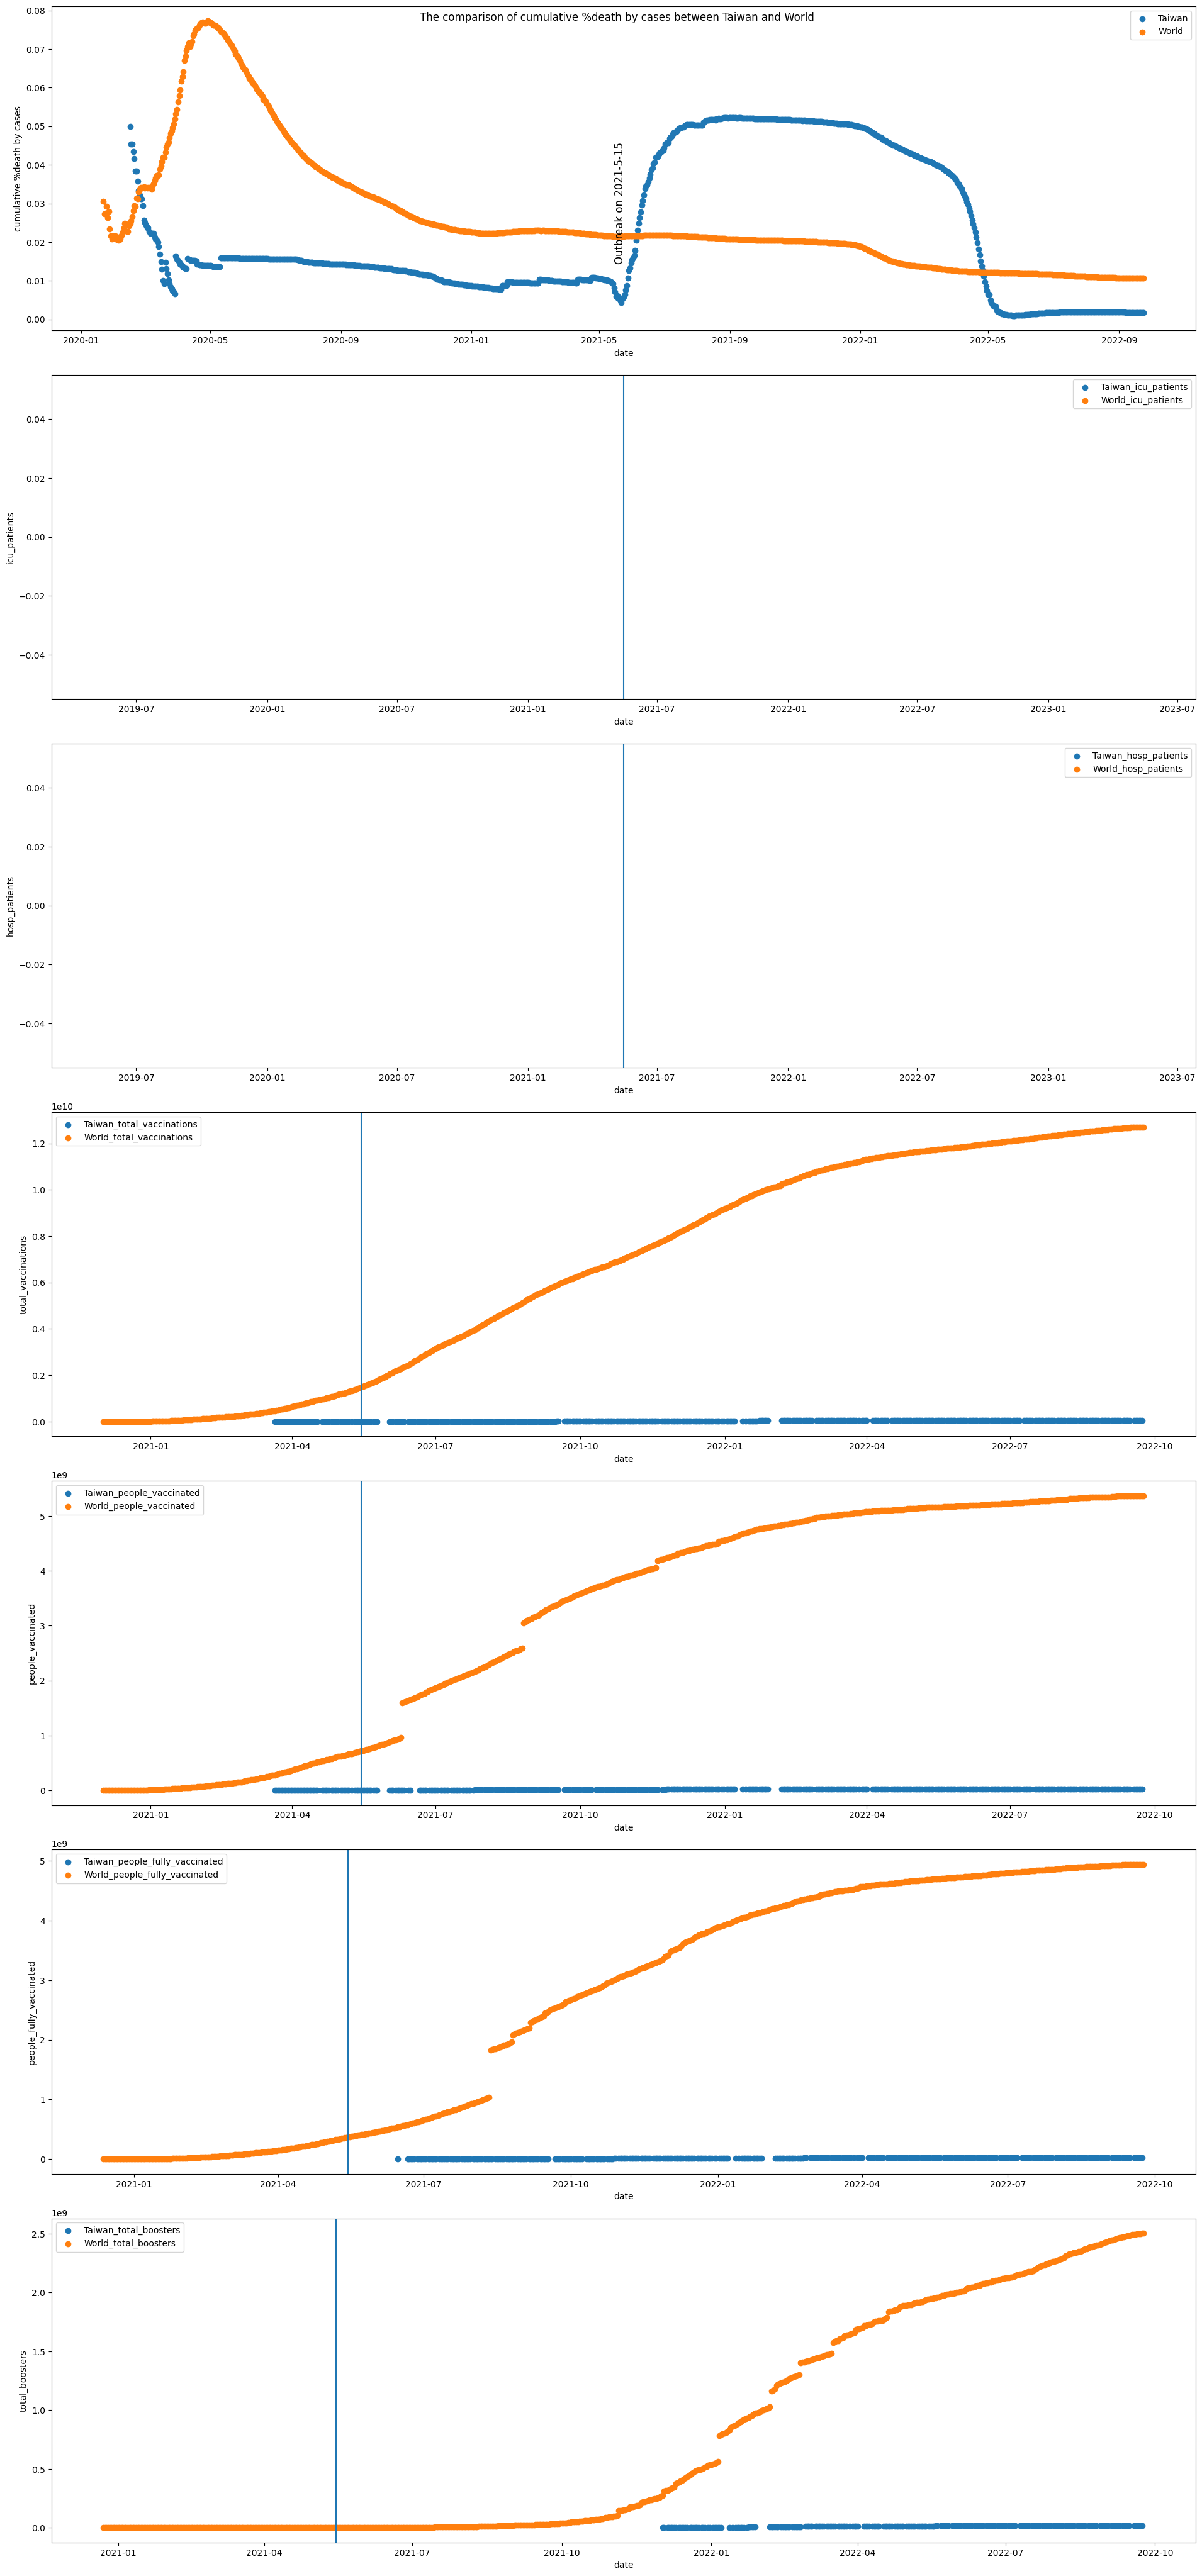

In [199]:
display_relationship(sus_col)

# 3. Explain why there is %death drop right before the outbreak.